In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import norm
import numpy.ma as ma
from scipy.linalg import expm

In [3]:
seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

## Next Reaction method

In [10]:
# Next reaction method applied to the Schlogl model
#
# Takes in parameters:
#     steps: the number of iterations
#     na: the inital number of molecules of chemical species A
#     nb: the initial number of molecules of chemical species of B
#     nx: the initial number of molecules of chemical species of x
#     q1,q2, q3, q4: Denote the reaction rates for reaction 1,2,3,4 respectively
#

def NRM(steps, na, nb, nx, q1, q2, q3, q4):
    ## Initial population
    X = zeros([3,steps + 1])
    X[:,0] = [na,nb,nx]

    # The corresponding changes to the number of molecules. R1, R2, R3 and R4 correspond
    # the changes if reaction 1,2,3,4 occured, respectively
    R1 = [-1, 0, +1]
    R2 = [+1, 0, -1]
    R3 = [0, -1, +1]
    R4 = [0, +1, -1]

    R = [R1,R2,R3,R4]

    # Reaction rates
    k1 = lambda p: q1*X[0,p]*X[2,p]*(X[2,p]-1)
    k2 = lambda p: q2*X[2,p]*(X[2,p]-1)*(X[2,p]-2)
    k3 = lambda p: q3*X[1,p]
    k4 = lambda p: q4*X[2,p]

    # Time
    t = lambda a ,b: -(1/a)*log(b)  # exponential time sampling
    tt = zeros(steps + 1)           
    
    # Main time stepping loop
    for g in range(steps):
        randomvar = rand()          # Uniform random variable generated
        randt = [t(k1(g),randomvar),t(k2(g),randomvar),t(k3(g),randomvar),t(k4(g),randomvar)]
        
        # If an element in randt became 0, that value is ignored:
        ind0 =[i for i, e in enumerate(randt) if e == 0]
        R = [i for j, i in enumerate(R) if j not in ind0]
        randt = [i for j, i in enumerate(randt) if j not in ind0]
        
        # The corresponding reaction associated with the next reaction time
        minpos = argmin(randt)
        
        # Number of molecules of each chemical species and time is updated
        X[:,g+1] = X[:,g] + R[minpos]
        tt[g+1] = tt[g] + randt[minpos]


    # Plots of the number of molecules for each chemical species   
    figure(figsize = (15,8))
    step(tt,X[0],label = "$n_{a}$")
    step(tt,X[1],label = "$n_{b}$")
    step(tt,X[2], label = "$n_{x}$")
    legend()
    title("""Schlogl Model w/ $n_{a}(0)$ = %g, $n_{b}(0)$ = %g and $n_{x}(0)$ = %g and 
    rates $k_{1} = $ %g,$k_{2} = $ %g, $k_{3} = $ %g, $k_{4} = $ %g""" % (na,nb,nx,q1,q2,q3,q4),fontsize=20)
    legend(loc=9, bbox_to_anchor=(0.5, -0.09), ncol=3, prop = {'size':20})
    xlabel('Time',fontsize = 15)
    ylabel('Number of molecules',fontsize = 15)
    rcParams.update({'font.size': 20})
    show()

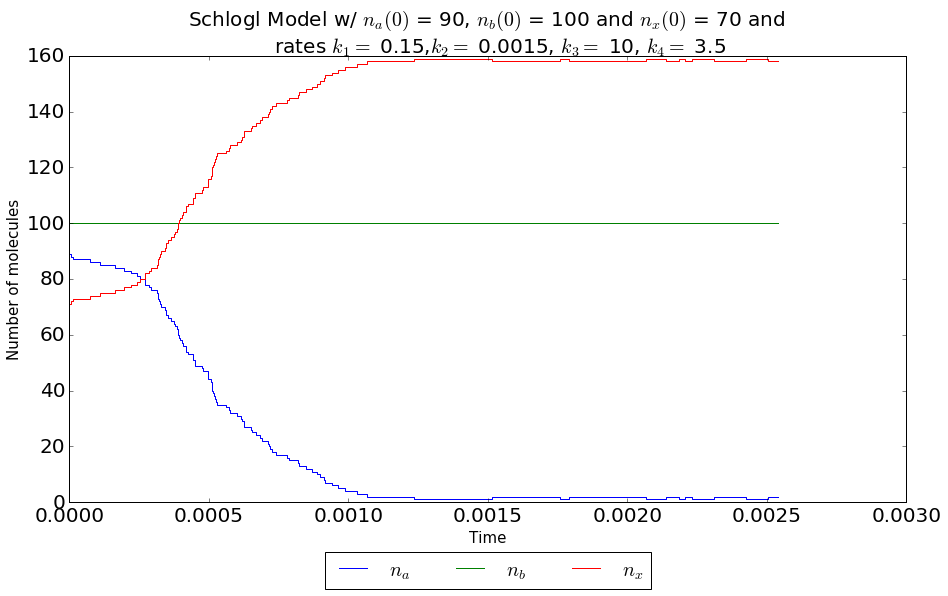

In [19]:
NRM(100,90,100,70,0.15,0.0015,10,3.5)

# Direct method

In [16]:
# Direct reaction method applied to the Schlogl model
#
# Takes in parameters:
#     steps: the number of iterations
#     na: the inital number of molecules of chemical species A
#     nb: the initial number of molecules of chemical species of B
#     nx: the initial number of molecules of chemical species of x
#     q1,q2, q3, q4: Denote the reaction rates for reaction 1,2,3,4 respectively
#

def DM(steps, na, nb, nx, q1, q2 ,q3 ,q4) :
    ## Initial population
    X = zeros([3,steps + 1])
    X[:,0] = [na,nb,nx]

    # The corresponding changes to the number of molecules. R1, R2, R3 and R4 correspond
    # the changes if reaction 1,2,3,4 occured, respectively
    R1 = [-1, 0, +1]
    R1 = [-1, 0, +1]
    R2 = [+1, 0, -1]
    R3 = [0, -1, +1]
    R4 = [0, +1, -1]

    R = [R1,R2,R3,R4]

    t = lambda a ,b: -(1/a)*log(b)        # exponential time sampling
    RT = zeros(steps + 1)

    # Reaction rates
    k1 = lambda p: q1*X[0,p]*X[2,p]*(X[2,p]-1)
    k2 = lambda p: q2*X[2,p]*(X[2,p]-1)*(X[2,p]-2)
    k3 = lambda p: q3*X[1,p]
    k4 = lambda p: q4*X[2,p]

    # Sum of all the reaction rates
    k = lambda p: k1(p) + k2(p) + k3(p) + k4(p)

    # Setting up regions
    r1 = lambda p: k1(p)/k(p)
    r2 = lambda p: (k1(p)+ k2(p))/k(p)
    r3 = lambda p: (k1(p)+k2(p)+k3(p))/k(p)

    # Main time stepping loop
    for i in range(steps):
        rt = t(k(i),rand())                # Uniform r.v to choose the next reaction time
        rn = rand()                        # Uniform r.v generated to choose the next reaction

        
        if (rn <= r1(i) and k1(i) > 0):
            pos = 0
        elif (rn <= r2(i) and k2(i) > 0):
            pos = 1
        elif (rn <= r3(i) and k3(i) > 0):
            pos = 2
        elif (k4(i) > 0):
            pos = 3

        # Number of molecules of each chemical species and time is updated
        X[:,i+1] = X[:,i] + R[pos]
        RT[i+1] = RT[i] + rt

    # Plotting
    figure(figsize = (15,8))
    step(RT,X[0],label = "$n_{a}$")
    step(RT,X[1], label = "$n_{b}$")
    step(RT,X[2], label = "$n_{x}$")
    legend()
    title("""Schlogl Model w/ $n_{a}(0)$ = %g, $n_{b}(0)$ = %g and $n_{x}(0)$ = %g and 
    rates $k_{1} = $ %g,$k_{2} = $ %g, $k_{3} = $ %g, $k_{4} = $ %g""" % (na,nb,nx,q1,q2,q3,q4),fontsize=15)
    legend(loc=9, bbox_to_anchor=(0.5, -0.08), ncol=3, prop = {'size':20})
    xlabel('Time',fontsize = 15)
    ylabel('Number of molecules',fontsize = 15)
    rcParams.update({'font.size': 20})
    show()

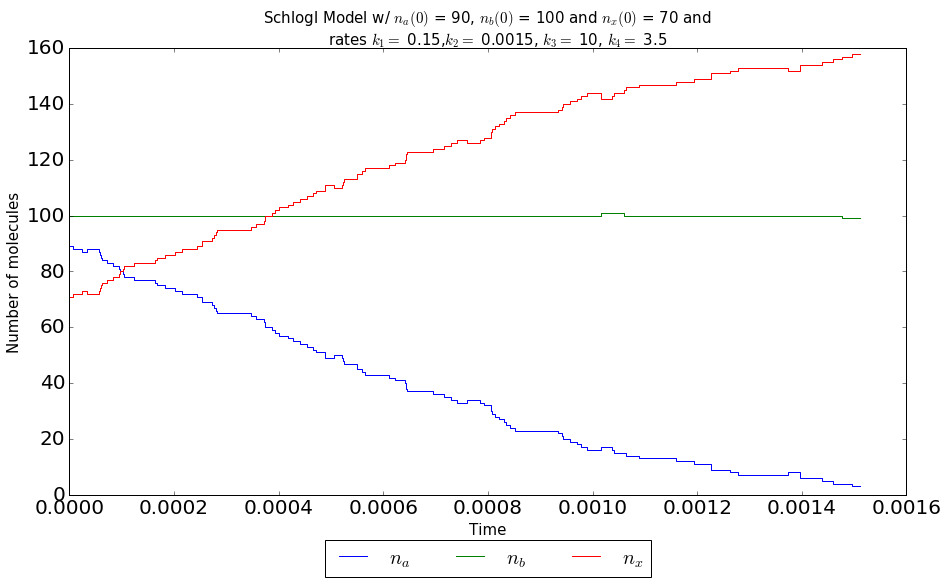

In [17]:
DM(100,90,100,70,0.15,0.0015,10,3.5)

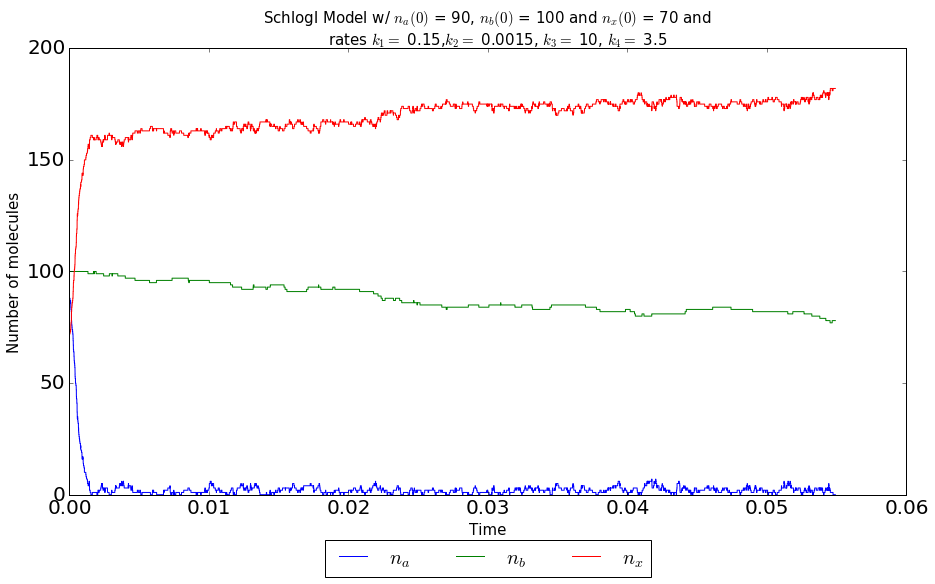

In [18]:
DM(1000,90,100,70,0.15,0.0015,10,3.5)